In [1]:
from matplotlib import pyplot as plt

In [2]:
from keras.preprocessing.image import img_to_array, load_img, ImageDataGenerator
from keras.applications import imagenet_utils
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [3]:
%matplotlib inline

# Generators

In [ ]:
[i for i in list(range(10))]

In [ ]:
def numbers(start, end=100):
    i = start
    while i < end:
        yield i
        i += 1

In [ ]:
gen = numbers(10, 20)

In [ ]:
next(gen)

# Generator Comprehensions

In [ ]:
l = [i*2 for i in range(10)]
l

In [ ]:
g = (i*2 for i in range(10))
next(g)

# Custom Iterables

In [ ]:
class Number:
    def __iter__(self):
        return numbers(0, 5)

In [ ]:
n = Number()
for i in n:
    print(i)

In [ ]:
list(n)

In [ ]:
iter(n)

In [ ]:
n.__iter__()

# Custom Indexing

In [ ]:
class Number2:
    def __init__(self, size):
        self.size = size

    def __len__(self):
        return self.size

    def __getitem__(self, idx):
        if idx > self.size:
            raise IndexError
        return idx

In [ ]:
n = Number2(10)

In [ ]:
len(n)

In [ ]:
n[4]

In [ ]:
n[20]

In [ ]:
for i in n:
    print(i)

# Model

In [4]:
import keras
import keras.backend as K

In [5]:
from pathlib import Path

In [6]:
import pandas as pd
import numpy as np

In [7]:
image_path = Path('/datasets/devset/dev-set/frames/')

In [8]:
!ls $image_path | head -10

video10-frame-1.jpg
video10-frame-120.jpg
video10-frame-144.jpg
video10-frame-168.jpg
video10-frame-24.jpg
video10-frame-48.jpg
video10-frame-72.jpg
video10-frame-96.jpg
video100-frame-1.jpg
video100-frame-120.jpg
ls: write error: Broken pipe


In [9]:
label_path = Path('/datasets/devset/dev-set/ground-truth/ground-truth_dev-set.csv')
df = pd.read_csv(label_path)
df.head()

,video,short-term_memorability,nb_short-term_annotations,long-term_memorability,nb_long-term_annotations
0,video10.webm,0.950,34,0.900,10
1,video100.webm,0.951,33,0.889,9
2,video10000.webm,0.832,33,1.000,13
3,video10001.webm,0.865,33,0.727,11
4,video10002.webm,0.899,59,0.792,24


In [11]:
def first_frame(fname):
    fname = fname.split('.')[0] + '-frame-1.jpg'
    return str(image_path / fname)

df['fname'] = df['video'].apply(first_frame)
df.head()

,video,short-term_memorability,nb_short-term_annotations,long-term_memorability,nb_long-term_annotations,fname
0,video10.webm,0.950,34,0.900,10,/datasets/devset/dev-set/frames/video10-frame-...
1,video100.webm,0.951,33,0.889,9,/datasets/devset/dev-set/frames/video100-frame...
2,video10000.webm,0.832,33,1.000,13,/datasets/devset/dev-set/frames/video10000-fra...
3,video10001.webm,0.865,33,0.727,11,/datasets/devset/dev-set/frames/video10001-fra...
4,video10002.webm,0.899,59,0.792,24,/datasets/devset/dev-set/frames/video10002-fra...


In [12]:
bs = 32

In [13]:
for idx, (video ,short_term, long_term, _, nb_annotations, fname) in df.iloc[:2].iterrows():
    print(fname)

/datasets/devset/dev-set/frames/video10-frame-1.jpg
/datasets/devset/dev-set/frames/video100-frame-1.jpg


In [14]:
def chunk(l, bs):
    for i in np.arange(0, len(l), bs):
        yield l[i:i+bs]
        
# test
l = list(range(100))
list(chunk(l, 9))

[[0, 1, 2, 3, 4, 5, 6, 7, 8],
 [9, 10, 11, 12, 13, 14, 15, 16, 17],
 [18, 19, 20, 21, 22, 23, 24, 25, 26],
 [27, 28, 29, 30, 31, 32, 33, 34, 35],
 [36, 37, 38, 39, 40, 41, 42, 43, 44],
 [45, 46, 47, 48, 49, 50, 51, 52, 53],
 [54, 55, 56, 57, 58, 59, 60, 61, 62],
 [63, 64, 65, 66, 67, 68, 69, 70, 71],
 [72, 73, 74, 75, 76, 77, 78, 79, 80],
 [81, 82, 83, 84, 85, 86, 87, 88, 89],
 [90, 91, 92, 93, 94, 95, 96, 97, 98],
 [99]]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


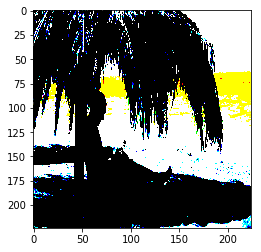

In [15]:
def open_image(image_path, size):
    # load the input image
    image = load_img(image_path, target_size=size)
    image = img_to_array(image)
    image = np.expand_dims(image, axis=0)
    image = imagenet_utils.preprocess_input(image)
    return image

# test
test_path = next(image_path.iterdir())
res = open_image(test_path, (224, 224))
plt.imshow(res[0])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


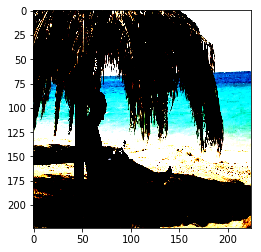

In [16]:
# rewrite to do our own image scaling
means = [0.485, 0.456, 0.406]
stds = [0.229, 0.224, 0.225]

def open_image(image_path, size):
    # load the input image
    image = load_img(image_path, target_size=size)
    image = img_to_array(image)
    image = np.expand_dims(image, axis=0)
    # normalize
    image = ((image / 255.) - means) / stds
    return image

# test
test_path = next(image_path.iterdir())
res = open_image(test_path, (224, 224))
plt.imshow(res[0])

In [17]:
numpy_path = image_path.parent / 'npy_frames'
!mkdir $numpy_path

mkdir: cannot create directory ‘/datasets/devset/dev-set/npy_frames’: File exists


In [18]:
from tqdm import tqdm_notebook as tqdm

In [19]:
images = list(image_path.iterdir())
for frame_path in tqdm(images):
    image = open_image(frame_path, (224, 224))
    path = numpy_path / frame_path.with_suffix('.numpy').name
    np.save(str(path), image)

KeyboardInterrupt: 

In [20]:
!ls $numpy_path

video10-frame-1.numpy.npy	video5503-frame-1.numpy.npy
video10-frame-120.numpy.npy	video5503-frame-120.numpy.npy
video10-frame-144.numpy.npy	video5503-frame-144.numpy.npy
video10-frame-168.numpy.npy	video5503-frame-168.numpy.npy
video10-frame-24.numpy.npy	video5503-frame-24.numpy.npy
video10-frame-48.numpy.npy	video5503-frame-48.numpy.npy
video10-frame-72.numpy.npy	video5503-frame-72.numpy.npy
video10-frame-96.numpy.npy	video5503-frame-96.numpy.npy
video100-frame-1.numpy.npy	video5504-frame-1.numpy.npy
video100-frame-120.numpy.npy	video5504-frame-120.numpy.npy
video100-frame-144.numpy.npy	video5504-frame-144.numpy.npy
video100-frame-168.numpy.npy	video5504-frame-168.numpy.npy
video100-frame-24.numpy.npy	video5504-frame-24.numpy.npy
video100-frame-48.numpy.npy	video5504-frame-48.numpy.npy
video100-frame-72.numpy.npy	video5504-frame-72.numpy.npy
video100-frame-96.numpy.npy	video5504-frame-96.numpy.npy
video10000-frame-1.numpy.npy	video5505-frame-1.numpy.npy
video10000-frame-120.numpy.npy	

video1867-frame-168.numpy.npy	video6370-frame-168.numpy.npy
video1867-frame-24.numpy.npy	video6370-frame-24.numpy.npy
video1867-frame-48.numpy.npy	video6370-frame-48.numpy.npy
video1867-frame-72.numpy.npy	video6370-frame-72.numpy.npy
video1867-frame-96.numpy.npy	video6370-frame-96.numpy.npy
video1868-frame-1.numpy.npy	video6373-frame-1.numpy.npy
video1868-frame-120.numpy.npy	video6373-frame-120.numpy.npy
video1868-frame-144.numpy.npy	video6373-frame-144.numpy.npy
video1868-frame-168.numpy.npy	video6373-frame-168.numpy.npy
video1868-frame-24.numpy.npy	video6373-frame-24.numpy.npy
video1868-frame-48.numpy.npy	video6373-frame-48.numpy.npy
video1868-frame-72.numpy.npy	video6373-frame-72.numpy.npy
video1868-frame-96.numpy.npy	video6373-frame-96.numpy.npy
video1869-frame-1.numpy.npy	video6376-frame-1.numpy.npy
video1869-frame-120.numpy.npy	video6376-frame-120.numpy.npy
video1869-frame-144.numpy.npy	video6376-frame-144.numpy.npy
video1869-frame-168.numpy.npy	video6376-frame-168.numpy.npy
vide

video3173-frame-144.numpy.npy	video7667-frame-144.numpy.npy
video3173-frame-168.numpy.npy	video7667-frame-168.numpy.npy
video3173-frame-24.numpy.npy	video7667-frame-24.numpy.npy
video3173-frame-48.numpy.npy	video7667-frame-48.numpy.npy
video3173-frame-72.numpy.npy	video7667-frame-72.numpy.npy
video3173-frame-96.numpy.npy	video7667-frame-96.numpy.npy
video3175-frame-1.numpy.npy	video7669-frame-1.numpy.npy
video3175-frame-120.numpy.npy	video7669-frame-120.numpy.npy
video3175-frame-144.numpy.npy	video7669-frame-144.numpy.npy
video3175-frame-168.numpy.npy	video7669-frame-168.numpy.npy
video3175-frame-24.numpy.npy	video7669-frame-24.numpy.npy
video3175-frame-48.numpy.npy	video7669-frame-48.numpy.npy
video3175-frame-72.numpy.npy	video7669-frame-72.numpy.npy
video3175-frame-96.numpy.npy	video7669-frame-96.numpy.npy
video3176-frame-1.numpy.npy	video767-frame-1.numpy.npy
video3176-frame-120.numpy.npy	video767-frame-120.numpy.npy
video3176-frame-144.numpy.npy	video767-frame-144.numpy.npy
video31

video4385-frame-72.numpy.npy	video8870-frame-72.numpy.npy
video4385-frame-96.numpy.npy	video8870-frame-96.numpy.npy
video4386-frame-1.numpy.npy	video8871-frame-1.numpy.npy
video4386-frame-120.numpy.npy	video8871-frame-120.numpy.npy
video4386-frame-144.numpy.npy	video8871-frame-144.numpy.npy
video4386-frame-168.numpy.npy	video8871-frame-168.numpy.npy
video4386-frame-24.numpy.npy	video8871-frame-24.numpy.npy
video4386-frame-48.numpy.npy	video8871-frame-48.numpy.npy
video4386-frame-72.numpy.npy	video8871-frame-72.numpy.npy
video4386-frame-96.numpy.npy	video8871-frame-96.numpy.npy
video4387-frame-1.numpy.npy	video8872-frame-1.numpy.npy
video4387-frame-120.numpy.npy	video8872-frame-120.numpy.npy
video4387-frame-144.numpy.npy	video8872-frame-144.numpy.npy
video4387-frame-168.numpy.npy	video8872-frame-168.numpy.npy
video4387-frame-24.numpy.npy	video8872-frame-24.numpy.npy
video4387-frame-48.numpy.npy	video8872-frame-48.numpy.npy
video4387-frame-72.numpy.npy	video8872-frame-72.numpy.npy
video4

video5434-frame-168.numpy.npy	video993-frame-168.numpy.npy
video5434-frame-24.numpy.npy	video993-frame-24.numpy.npy
video5434-frame-48.numpy.npy	video993-frame-48.numpy.npy
video5434-frame-72.numpy.npy	video993-frame-72.numpy.npy
video5434-frame-96.numpy.npy	video993-frame-96.numpy.npy
video5435-frame-1.numpy.npy	video9930-frame-1.numpy.npy
video5435-frame-120.numpy.npy	video9930-frame-120.numpy.npy
video5435-frame-144.numpy.npy	video9930-frame-144.numpy.npy
video5435-frame-168.numpy.npy	video9930-frame-168.numpy.npy
video5435-frame-24.numpy.npy	video9930-frame-24.numpy.npy
video5435-frame-48.numpy.npy	video9930-frame-48.numpy.npy
video5435-frame-72.numpy.npy	video9930-frame-72.numpy.npy
video5435-frame-96.numpy.npy	video9930-frame-96.numpy.npy
video5436-frame-1.numpy.npy	video9931-frame-1.numpy.npy
video5436-frame-120.numpy.npy	video9931-frame-120.numpy.npy
video5436-frame-144.numpy.npy	video9931-frame-144.numpy.npy
video5436-frame-168.numpy.npy	video9931-frame-168.numpy.npy
video5436

In [26]:
numpy_path

PosixPath('/datasets/devset/dev-set/npy_frames')

In [30]:
def first_frame(fname):
    fname = fname.split('.')[0] + '-frame-1.numpy.npy'
    return str(numpy_path / fname)

df['numpy_fname'] = df['video'].apply(first_frame)
df.head()

,video,short-term_memorability,nb_short-term_annotations,long-term_memorability,nb_long-term_annotations,fname,numpy_fname
0,video10.webm,0.950,34,0.900,10,/datasets/devset/dev-set/frames/video10-frame-...,/datasets/devset/dev-set/npy_frames/video10-fr...
1,video100.webm,0.951,33,0.889,9,/datasets/devset/dev-set/frames/video100-frame...,/datasets/devset/dev-set/npy_frames/video100-f...
2,video10000.webm,0.832,33,1.000,13,/datasets/devset/dev-set/frames/video10000-fra...,/datasets/devset/dev-set/npy_frames/video10000...
3,video10001.webm,0.865,33,0.727,11,/datasets/devset/dev-set/frames/video10001-fra...,/datasets/devset/dev-set/npy_frames/video10001...
4,video10002.webm,0.899,59,0.792,24,/datasets/devset/dev-set/frames/video10002-fra...,/datasets/devset/dev-set/npy_frames/video10002...


In [25]:
example_image

PosixPath('/datasets/devset/dev-set/npy_frames/video2693-frame-144.numpy.npy')

In [32]:
def data_generator(df, bs, size=(224, 224)):
    for batch in chunk(list(df.iterrows()), bs):
        images = []
        labels = []
        for idx, (_, short_term, _, long_term, _, _, numpy_fname) in batch:
            images.append(np.load(numpy_fname))
            labels.append(short_term)
        images = np.vstack(images)
        yield (images, labels)

In [33]:
gen = data_generator(df, bs=32)
x, y = next(gen)
x.shape

(32, 224, 224, 3)

In [74]:
numpy_files = list(numpy_path.iterdir())
image_files = list(image_path.iterdir())

In [65]:
from random import choice

In [83]:
%%timeit
np.load(choice(numpy_files))
None

22.8 ms ± 2.2 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [84]:
%%timeit
open_image(choice(image_files), (224, 224))
None

39.6 ms ± 3.45 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [69]:
%%time
x, y = next(gen)

CPU times: user 86.7 ms, sys: 89.9 ms, total: 177 ms
Wall time: 904 ms


# Decode Images

In [ ]:
example_image = next(image_path.iterdir())
im = open_image(example_image, (224, 224))

In [ ]:
a = (im - means) / stds

In [ ]:
a.shape

In [ ]:
a.reshape(-1, 3).mean(axis=0)

In [ ]:
a.reshape(-1, 3).std(axis=0)

In [ ]:
plt.imshow(a)

In [ ]:
im = im[0] / 255.
#im = (im - means) / stds
im.shape

In [ ]:
plt.imshow(im[0] / 255.)

# Train Model

In [ ]:
from keras.applications import ResNet152
from keras.models import Model
from keras.optimizers import Adam
from keras.layers import Input, Dense, Flatten, Dropout

In [ ]:
base_model = ResNet152(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

In [ ]:
# Head Model
head_model = base_model.output
head_model = Flatten(name="flatten")(head_model)
head_model = Dense(20, activation="relu")(head_model)
#head_model = Dropout(DROPOUT)(head_model)
head_model = Dense(1)(head_model)

In [ ]:
model = Model(inputs=base_model.input, outputs=head_model)

print("[INFO] Freezing the model's layers...")
# loop over all layers in the base model and freeze them so they
# will *not* be updated during the training process
for layer in base_model.layers:
    layer.trainable = False

In [ ]:
opt = Adam(lr=3e-4)
model.compile(
    loss='mean_squared_error',
    optimizer=opt,
    metrics=['mse', 'mae', 'mape'],
)

In [ ]:
# BAD
train = data_generator(df, bs=32)
val = data_generator(df, bs=32)

In [ ]:
print("[INFO] Training model's head...")
model.fit_generator(
    train,
    validation_data=val,
    epochs=1,
    steps_per_epoch=len(df) // 32,
    validation_steps=len(df) // 32,
    verbose=1,
    workers=4, use_multiprocessing=True)